In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.preprocessing as pp
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()


pd.options.mode.chained_assignment = None
pd.options.display.max_columns =None

In [2]:
data = pd.read_csv("C:\\Users\\HP\\Downloads\\CC GENERAL.CSV")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
data =data.fillna(data.mean())
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Remove Cust_id as the same won't be helpful in the clustering algorithm

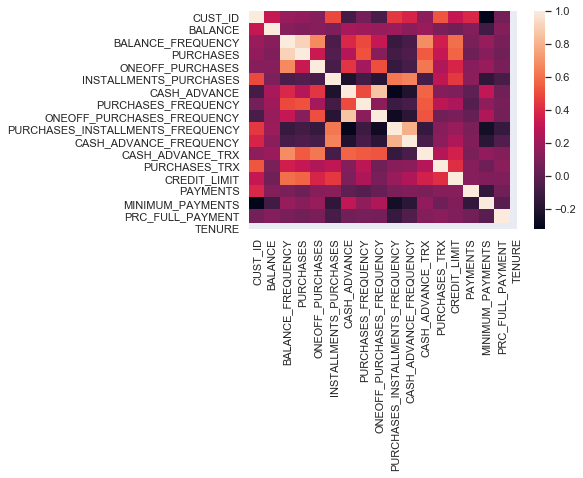

In [5]:
#Correlation Plot
sns.heatmap(data.corr(),
            xticklabels=data.columns,
            yticklabels=data.columns
           )

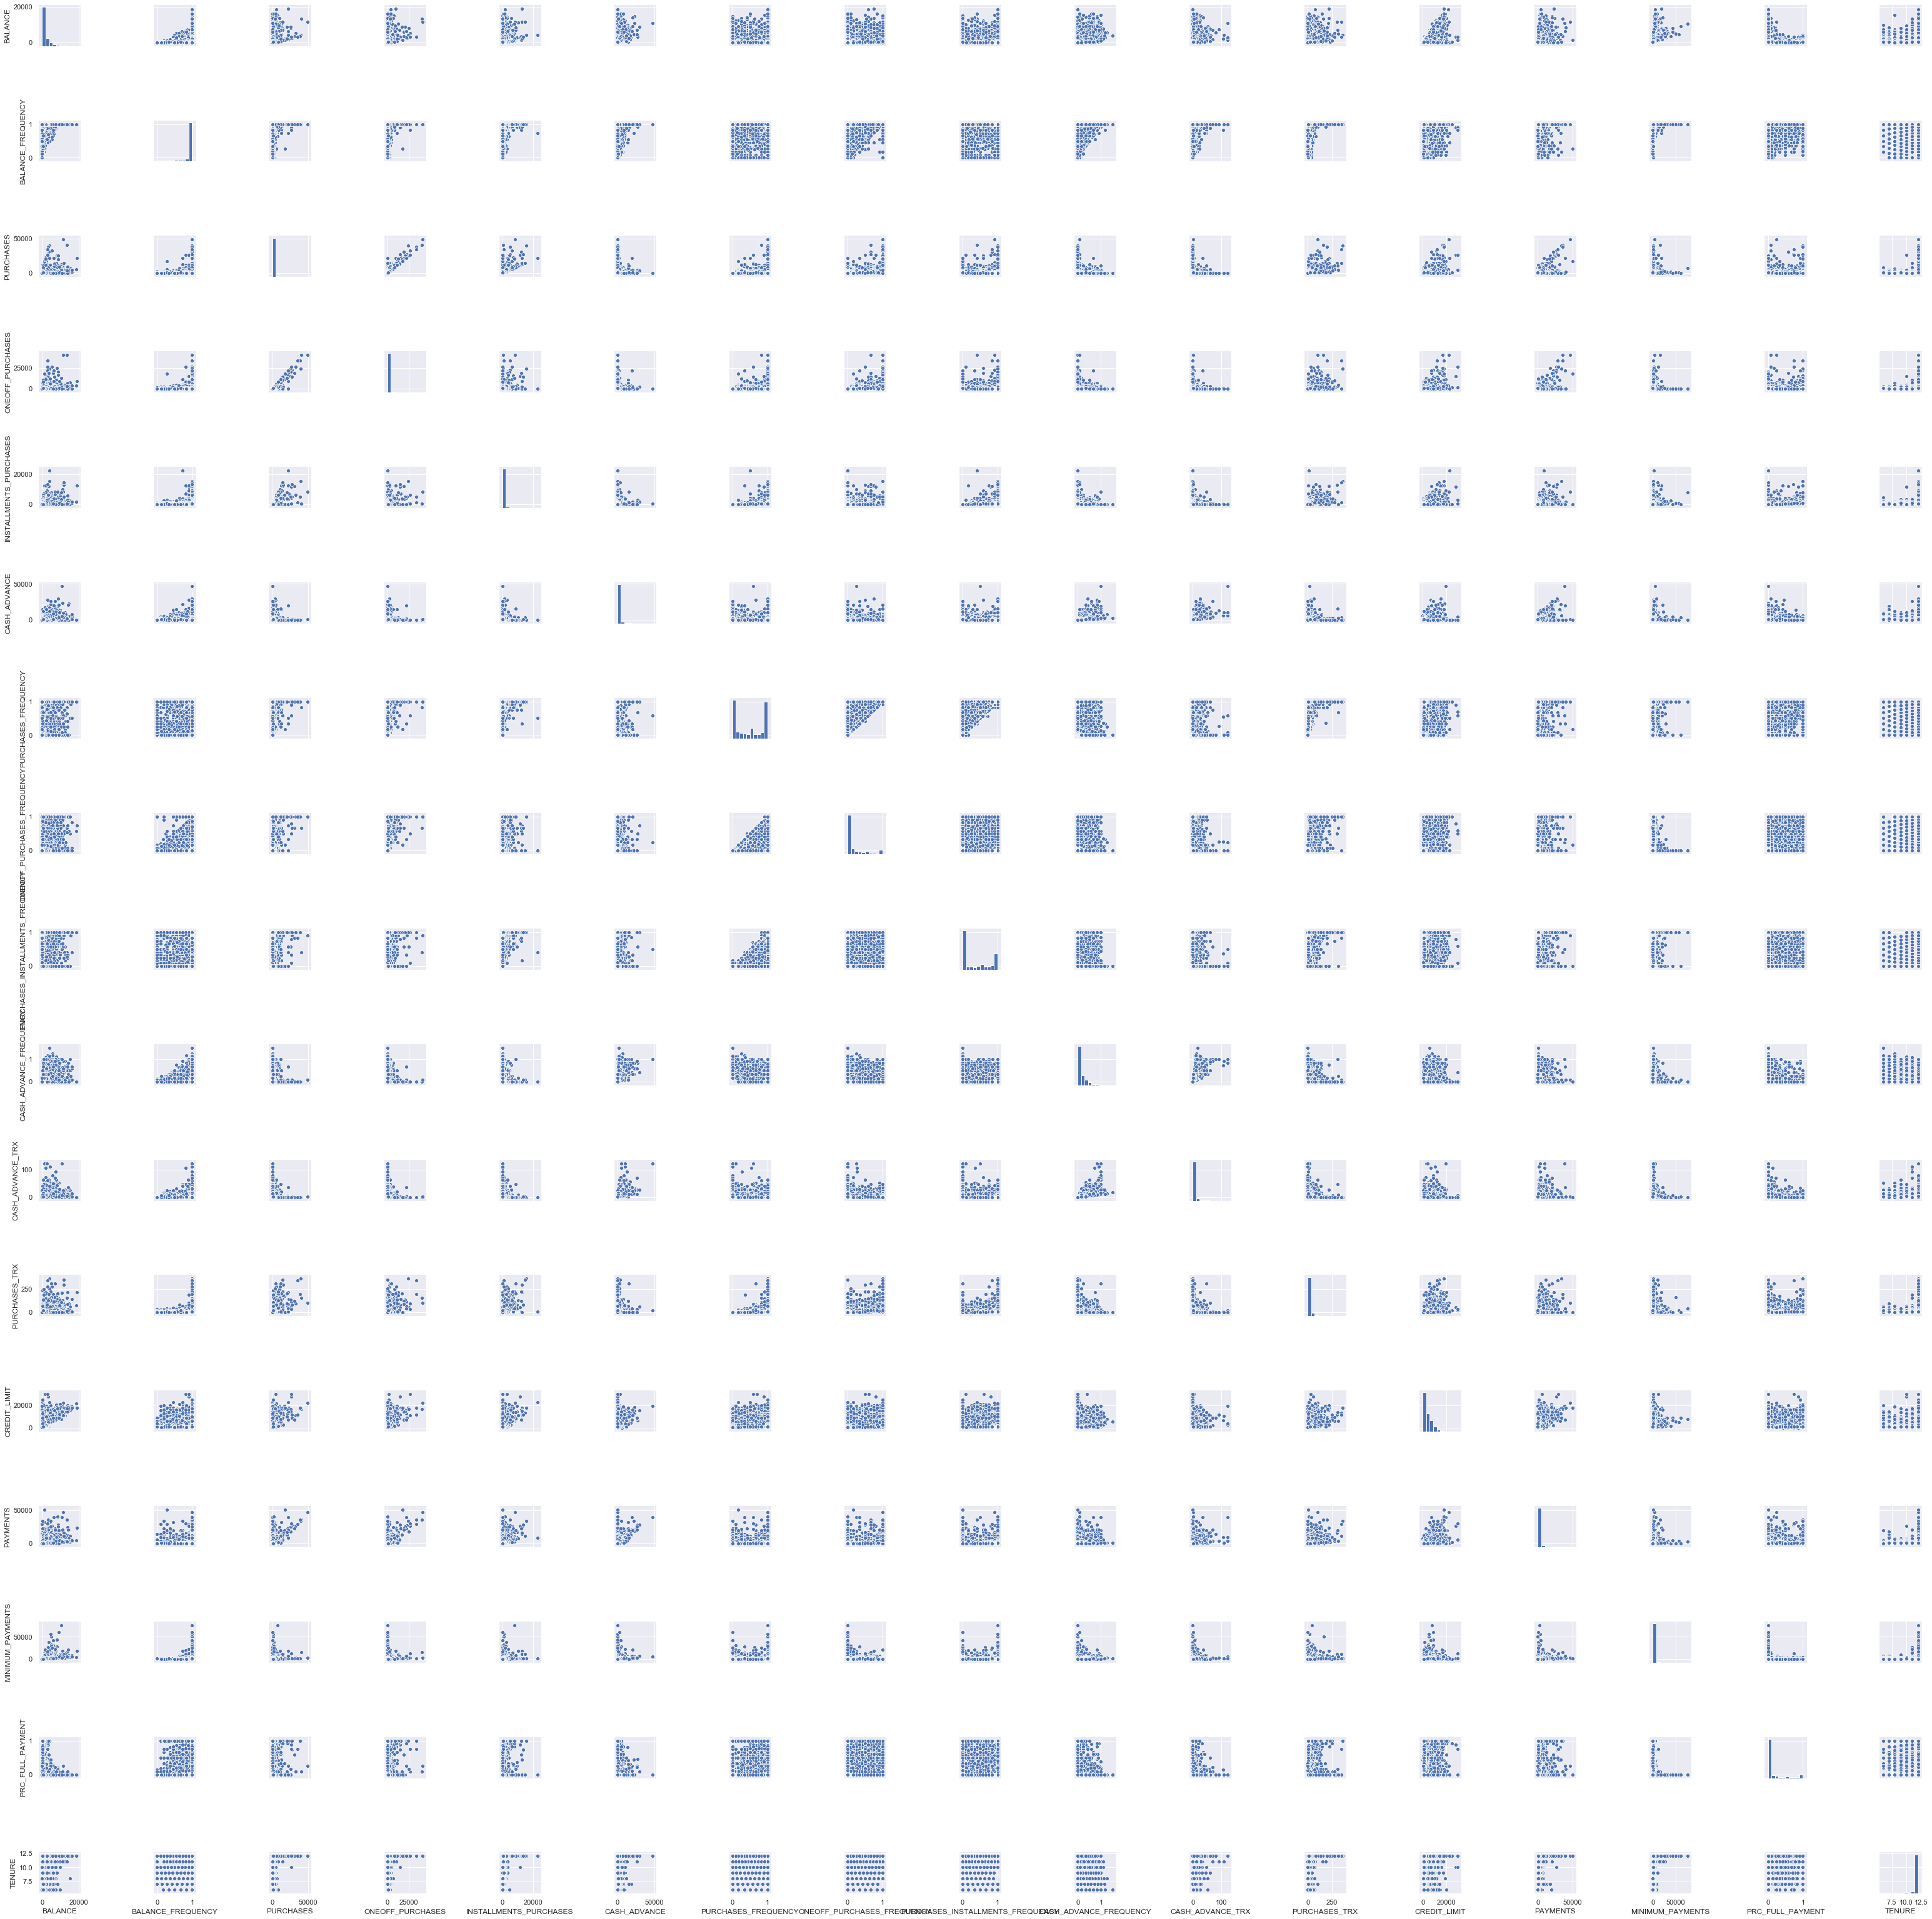

In [6]:
#Pairplot - dispersion between variables
sns.pairplot(data)

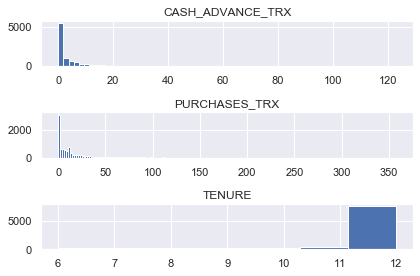

In [7]:
# Distribution of int64 variables
fig, axes = plt.subplots(nrows=3, ncols=1)
ax0, ax1, ax2 = axes.flatten()

ax0.hist(data['CASH_ADVANCE_TRX'], 65, histtype='bar', stacked=True)
ax0.set_title('CASH_ADVANCE_TRX')

ax1.hist(data['PURCHASES_TRX'], 173, histtype='bar', stacked=True)
ax1.set_title('PURCHASES_TRX')

ax2.hist(data['TENURE'], 7, histtype='bar', stacked=True)
ax2.set_title('TENURE')

fig.tight_layout()
plt.show()

# Feature generation
Used technics:
- Log transformation
- Standardization
- Statistics for some variables (like mean, median, first and third quartile and mode)

In [8]:
#Creating a copy of Data
features = data.copy()
list(features)

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [9]:
# Log-transformation

cols =  ['BALANCE',
         'PURCHASES',
         'ONEOFF_PURCHASES',
         'INSTALLMENTS_PURCHASES',
         'CASH_ADVANCE',
         'CASH_ADVANCE_TRX',
         'PURCHASES_TRX',
         'CREDIT_LIMIT',
         'PAYMENTS',
         'MINIMUM_PAYMENTS',
        ]

# Note: Adding 1 for each value to avoid inf values
features[cols] = np.log(1 + features[cols])

features.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,3.735304,0.818182,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,12
1,C10002,8.071989,0.909091,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.250000,1.609438,0.000000,8.853808,8.319725,6.978531,0.222222,12
2,C10003,7.822504,1.000000,6.651791,6.651791,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,12
3,C10004,7.419183,0.636364,7.313220,7.313220,0.000000,5.331694,0.083333,0.083333,0.000000,0.083333,0.693147,0.693147,8.922792,0.000000,6.762968,0.000000,12
4,C10005,6.707735,1.000000,2.833213,2.833213,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,12


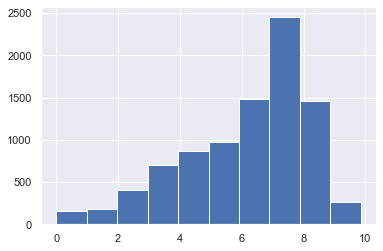

In [10]:
plt.hist(features["BALANCE"]);

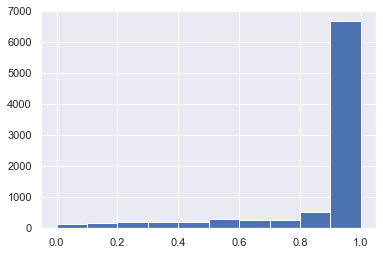

In [11]:
plt.hist(features["BALANCE_FREQUENCY"]);

In [12]:
#OUTLIER TREATMENT

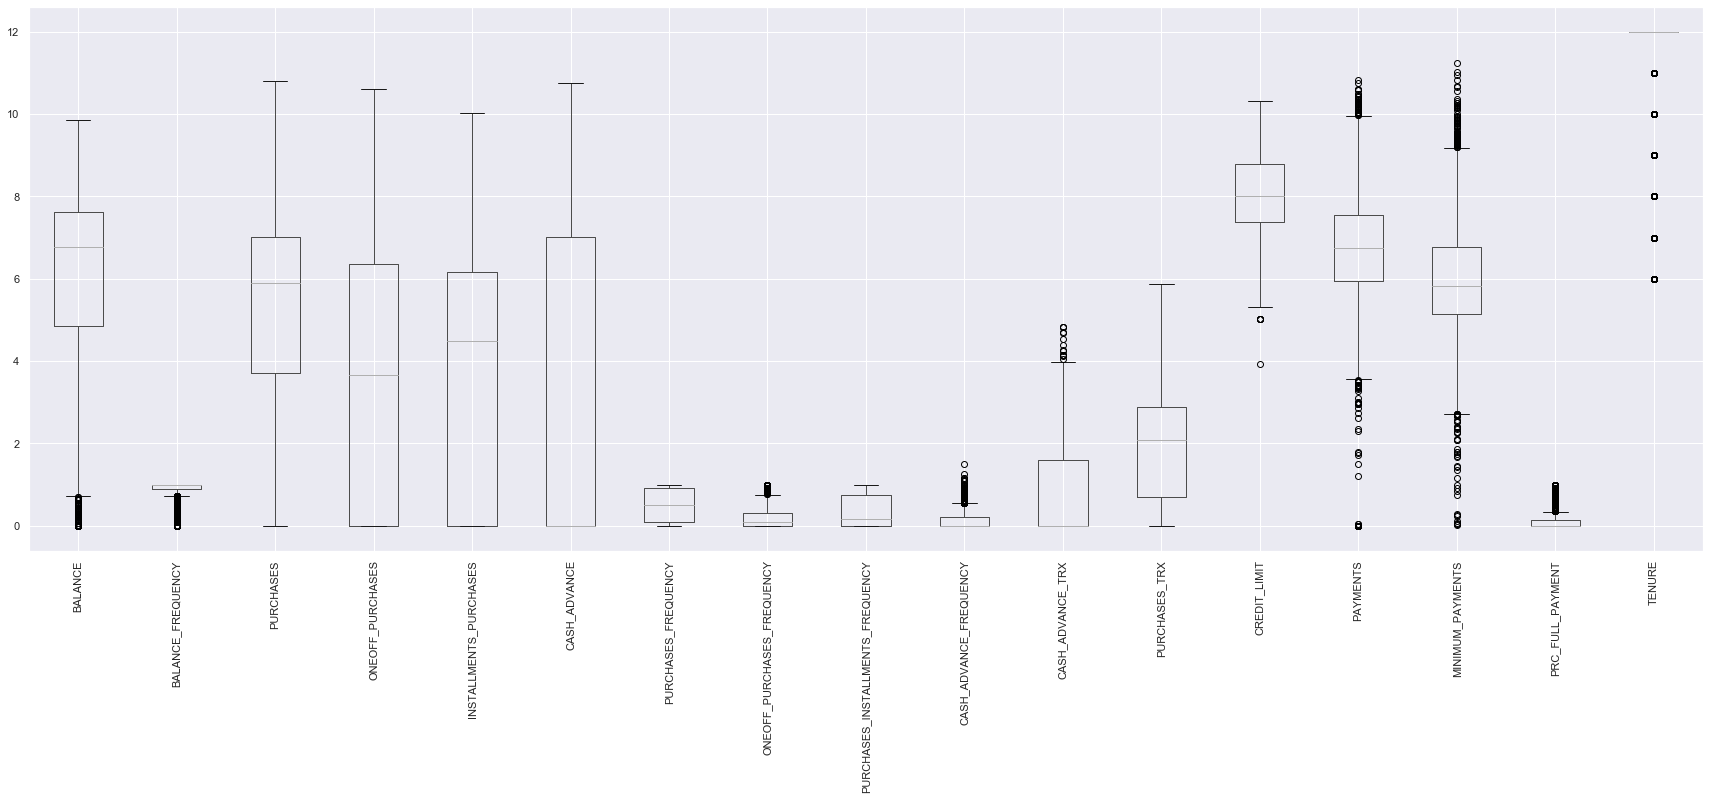

In [13]:
# Using boxplot to identify possible outliers, after log-transform

features.boxplot(rot=90, figsize=(30,10))

In [14]:
features.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,3.735304,0.818182,4.568506,0.000000,4.568506,0.000000,0.166667,0.0,0.083333,0.00,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,12
1,C10002,8.071989,0.909091,0.000000,0.000000,0.000000,8.770896,0.000000,0.0,0.000000,0.25,1.609438,0.000000,8.853808,8.319725,6.978531,0.222222,12
2,C10003,7.822504,1.000000,6.651791,6.651791,0.000000,0.000000,1.000000,1.0,0.000000,0.00,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,12


In [17]:
features = features.drop("CUST_ID",1)

In [18]:
cols = list(features)
irq_score = {}

for c in cols:
    q1 = features[c].quantile(0.25)
    q3 = features[c].quantile(0.75)
    score = q3 - q1
    outliers = features[(features[c] < q1 - 1.5 * score) | (features[c] > q3 + 1.5 * score)][c]
    values = features[(features[c] >= q1 - 1.5 * score) | (features[c] <= q3 + 1.5 * score)][c]
    
    irq_score[c] = {
        "Q1": q1,
        "Q3": q3,
        "IRQ": score,
        "n_outliers": outliers.count(),
        "outliers_avg": outliers.mean(),
        "outliers_stdev": outliers.std(),
        "outliers_median": outliers.median(),
        "values_avg:": values.mean(),
        "values_stdev": values.std(),
        "values_median": values.median(),
    }
    
irq_score = pd.DataFrame.from_dict(irq_score, orient='index')

irq_score


,Q1,Q3,IRQ,n_outliers,outliers_avg,outliers_stdev,outliers_median,values_avg:,values_stdev,values_median
BALANCE,4.861995,7.628099,2.766104,132,0.126403,0.212619,0.000000,6.161637,2.013303,6.773521
BALANCE_FREQUENCY,0.888889,1.000000,0.111111,1493,0.396616,0.194740,0.454545,0.877271,0.236904,1.000000
PURCHASES,3.704627,7.013133,3.308506,0,NaN,NaN,NaN,4.899647,2.916872,5.892417
ONEOFF_PURCHASES,0.000000,6.360274,6.360274,0,NaN,NaN,NaN,3.204274,3.246365,3.663562
INSTALLMENTS_PURCHASES,0.000000,6.151961,6.151961,0,NaN,NaN,NaN,3.352403,3.082973,4.499810
CASH_ADVANCE,0.000000,7.016449,7.016449,0,NaN,NaN,NaN,3.319086,3.566298,0.000000
PURCHASES_FREQUENCY,0.083333,0.916667,0.833334,0,NaN,NaN,NaN,0.490351,0.401371,0.500000
ONEOFF_PURCHASES_FREQUENCY,0.000000,0.300000,0.300000,782,0.952398,0.065798,1.000000,0.202458,0.298336,0.083333
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000,0.750000,0.750000,0,NaN,NaN,NaN,0.364437,0.397448,0.166667
CASH_ADVANCE_FREQUENCY,0.000000,0.222222,0.222222,525,0.710399,0.137328,0.666667,0.135144,0.200121,0.000000


# Feature Scaling
Here we can use scale function of sklearn.preprocessing.
This function will put all variables at the same scale, with mean zero and standard deviation equals to one.

In [25]:
#Can use sklearn.preprocessing.StandardScaler, also
for i in cols:
    features[cols] = pp.scale(np.array(features[cols]))

features

# Clustering using K-Means
Now we`re ready to apply the clustering algorithm, using KMeans from sklearn.cluster.

Firstly, using Elbow`s method, we can find optimized no. of clusters for clustering

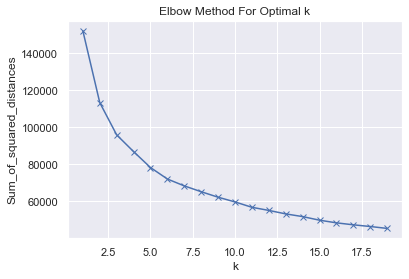

In [32]:
X = np.array(features)
Sum_of_squared_distances = []
K = range(1, 20) #x-axis range

for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

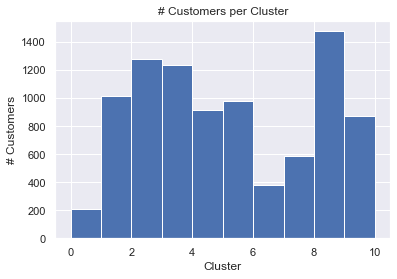

In [33]:
#Number of Clusters chosen = 10
# Customers per cluster

n_clusters = 10
clustering = KMeans(n_clusters=n_clusters, random_state=0)
cluster_labels = clustering.fit_predict(X)

# plot cluster sizes

plt.hist(cluster_labels, bins=range(n_clusters+1))
plt.title('# Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('# Customers')
plt.show()

# Assigng cluster number to features and original dataframe
features['cluster_index'] = cluster_labels
data['cluster_index'] = cluster_labels

## Glimpse of the final dataset with cluster_label column

In [39]:
data.head(4)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_index
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,9
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
